In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from google.colab.patches import cv2_imshow
#from zipfile import ZipFile

## Dataset loading

In [3]:
# unzipping dogs-vs-cats.zip
# only one time need to be done
"""
dataset = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted")"""

'\ndataset = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\dogs-vs-cats.zip"\n\nwith ZipFile(dataset, \'r\') as zip:\n    zip.extractall()\n    print("The dataset is extracted")'

In [4]:
# unzipping train.zip
"""
dataset = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted")"""

'\ndataset = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train.zip"\n\nwith ZipFile(dataset, \'r\') as zip:\n    zip.extractall()\n    print("The dataset is extracted")'

In [5]:
# counting the number of files in train folder

path,dirs,files = next(os.walk('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train'))

file_count = len(files)
print('Number of Images:',file_count)

Number of Images: 25000


In [6]:
# printing name of images

file_names = os.listdir('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train')
#print(file_names)

##  Display and understand data

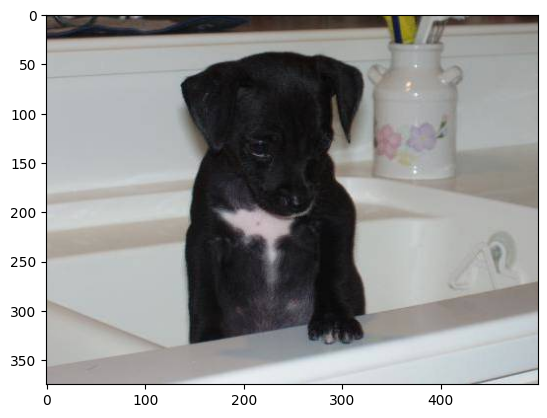

In [7]:
img = mpimg.imread('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train\\dog.8298.jpg')
plt.imshow(img)

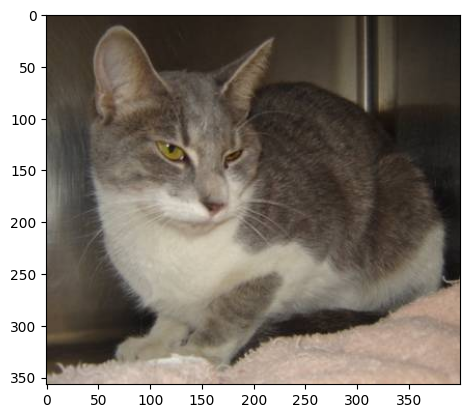

In [8]:
img = mpimg.imread('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train\\cat.4352.jpg')
plt.imshow(img)

##  Preprocessing Images


In [9]:
file_names = os.listdir('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train')

In [10]:
file_names[0:9]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg']

In [11]:
dogs = 0
cats = 0

for img in file_names:
    name = img[0:3] # get dog or cat
    
    if name=='dog':
        dogs+=1
    else:
        cats+=1

In [12]:
print('Number of dog images: ',dogs)
print('Number of cats images: ',cats)

Number of dog images:  12500
Number of cats images:  12500


In [13]:
file_names[12499]

'cat.9999.jpg'

#### Resize images

In [14]:
# create a new directory for resized images

#os.mkdir('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized')

In [15]:
original_path = 'C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\train\\'
resized_path = 'C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized\\'

# only one time need to be done
"""
for i in range(1000):
    
    #cats
    cat_filename = os.listdir(original_path)[i]
    cat_img_path = original_path+cat_filename # find path of each oraginal folder images
    
    #dogs
    dog_filename = os.listdir(original_path)[i+12500]
    dog_img_path = original_path+dog_filename # find path of each oraginal folder images
    
    
    # resize each image in oraginal folder
    cat_img = Image.open(cat_img_path)
    cat_img = cat_img.resize((224,224))
    cat_img.convert("RGB")
    
    dog_img = Image.open(dog_img_path)
    dog_img = dog_img.resize((224,224))
    dog_img.convert("RGB")
    
    # save resized images in resized folder
    cat_newImagePath = resized_path+cat_filename
    dog_newImagePath = resized_path+dog_filename
    
    cat_img.save(cat_newImagePath)
    dog_img.save(dog_newImagePath)
    
    """

'\nfor i in range(1000):\n    \n    #cats\n    cat_filename = os.listdir(original_path)[i]\n    cat_img_path = original_path+cat_filename # find path of each oraginal folder images\n    \n    #dogs\n    dog_filename = os.listdir(original_path)[i+12500]\n    dog_img_path = original_path+dog_filename # find path of each oraginal folder images\n    \n    \n    # resize each image in oraginal folder\n    cat_img = Image.open(cat_img_path)\n    cat_img = cat_img.resize((224,224))\n    cat_img.convert("RGB")\n    \n    dog_img = Image.open(dog_img_path)\n    dog_img = dog_img.resize((224,224))\n    dog_img.convert("RGB")\n    \n    # save resized images in resized folder\n    cat_newImagePath = resized_path+cat_filename\n    dog_newImagePath = resized_path+dog_filename\n    \n    cat_img.save(cat_newImagePath)\n    dog_img.save(dog_newImagePath)\n    \n    '

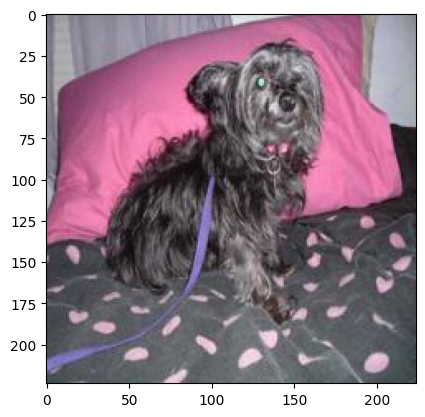

In [16]:
# show resized images

img = mpimg.imread('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized\\dog.0.jpg')
plt.imshow(img)

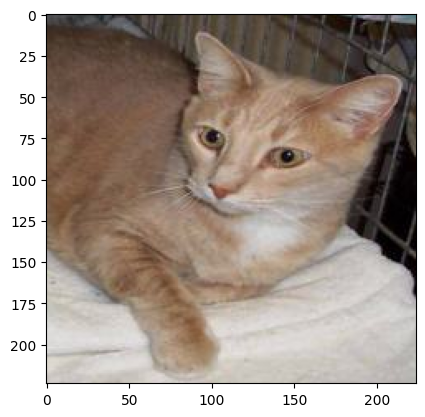

In [17]:
img = mpimg.imread('C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized\\cat.10887.jpg')
plt.imshow(img)

#### Create labels 

In [18]:
# cat : 0
# dog : 1

In [19]:
labels = []
file_names = 'C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized\\'

for i in range(2000):
    
    file_name = os.listdir(file_names)[i] # take each image name
    label = file_name[0:3] # dog or cat
    
    if label=='dog':
        labels.append(1)
    else:
        labels.append(0)

In [20]:
print(os.listdir(file_names)[0:5])
print(labels[0:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
[0, 0, 0, 0, 0]


In [21]:
# find cat and dog counts in resized images

values,counts = np.unique(labels,return_counts=True)

print(values)
print(counts)

[0 1]
[1000 1000]


#### Convert images to numpy arrays 

In [22]:
import cv2
import glob

In [23]:
image_dir = 'C:\\Users\\Anuruddha\\Desktop\\ML_projects\\29.DoG_Vs_Cat_Classification\\database\\Image_resized\\'


# if dat base contain diffrent image extentions
image_extention = ['png', 'jpg']

#
files = []

# this last for loop need only when dat base contain diffrent format images(jpg, png,...)
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extention] # get all image paths in one list
# here extend is same as append

# save as numpy array
dog_cat_images = np.array([cv2.imread(file) for file in files])

In [24]:
#files

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


#### Split data 

In [26]:
X = dog_cat_images 
Y = np.asarray(labels)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
# rescaling data beetween 0 and 1

X_train_scale = X_train/255
X_test_scale = X_test/255

## Model 

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
mobile_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretraind_model = hub.KerasLayer(mobile_model,input_shape=(224,224,3), trainable=False)

In [32]:
num_classes = 2

model = tf.keras.Sequential([
    
    pretraind_model, # first layers
    tf.keras.layers.Dense(num_classes)  # out put layer
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics = ['acc']
)

In [34]:
model.fit(X_train_scale, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 229s 1s/step - loss: 0.3050 - acc: 0.8712
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0874 - acc: 0.9706
Epoch 3/5
50/50 [==============================] - 44s 874ms/step - loss: 0.0658 - acc: 0.9762
Epoch 4/5
50/50 [==============================] - 41s 831ms/step - loss: 0.0523 - acc: 0.9781
Epoch 5/5
50/50 [==============================] - 42s 848ms/step - loss: 0.0407 - acc: 0.9837


In [37]:
# model evaluation

score,acc = model.evaluate(X_test_scale,Y_test)
print("Test Loss:",score)
print("Test Accuracy:",acc)      

13/13 [==============================] - 75s 2s/step - loss: 0.0622 - acc: 0.9900
Test Loss: 0.06215949356555939
Test Accuracy: 0.9900000095367432


## Predictive system 

In [1]:
input_image_path = input("Path of image to be predicted: ")

input_image = cv2.imread(input_image_path)  # make numpy array from image

plt.imshow('image',input_image)  # display  the input image

input_image_resize = cv2.resize(input_image,(224,224)) # resize the image

input_image_scaled = input_image_resize/255 # normalize data

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # only one image and rgb colors




# prediction

prediction = model.predict(image_reshaped)  # get prediction probability

# label get from highst probability

image_label = np.argmax(prediction)

if image_label==0:
    print("This is a Cat")
else:
    print("This is a DOG")

Path of image to be predicted: C:\Users\Anuruddha\Desktop\ML_projects\29.DoG_Vs_Cat_Classification\database\testing_system\cat.jpg


NameError: name 'cv2' is not defined